# Predicting CO2 Emission Per Capita for a country using energy consumptions

by Tony Shum, Jing Wen, Aishwarya Nadimpally, Weilin Han

In [2]:
import pandas as pd
from myst_nb import glue
import pickle
from IPython import display

In [3]:
model_scores_df = pd.read_csv("../results/tables/model_scores.csv").round(2)
glue("r2_score_train", model_scores_df['r2_score_train'].values[0], display=False)
glue("r2_score_test", model_scores_df['r2_score_test'].values[0], display=False)
glue("rmse_train", model_scores_df['rmse_train'].values[0], display=False)
glue("rmse_test", model_scores_df['rmse_test'].values[0], display=False)

model_scores_df = model_scores_df.style.format().hide()
glue("model_scores_df", model_scores_df, display=False)

In [13]:
model_selection_scores_df = pd.read_csv("../results/tables/model_selection_scores.csv")
glue("KNN_reg", model_selection_scores_df['KNN_reg'].values[3], display=False)

model_selection_scores_df = model_selection_scores_df.style.format().hide()
glue("model_selection_scores_df", model_selection_scores_df, display=False)

In [14]:
hyperparameter_tuning_scores_df = pd.read_csv("../results/tables/hyperparameter_tuning_scores.csv").round(3)

glue("mean_test_r2", hyperparameter_tuning_scores_df['mean_test_r2'].values[0], display=False)

hyperparameter_tuning_scores_df = hyperparameter_tuning_scores_df.style.format().hide()
glue("hyperparameter_tuning_scores_df", hyperparameter_tuning_scores_df, display=False)

# Summary

Here we attempt to build a prediction model employing the k-nearest neighbours algorithm, designed to leverage energy consumption and energy generation measurements to predict CO2 emissions of a country. Our model's performance on the unseen test dataset is quite commendable, as reflected by an $\text{R}^2$ of {glue:text}`r2_score_test`.

However, the model's effectiveness lies in its ability to identify instances in the training dataset that closely resemble the data it is trying to predict. This means that when it encounters scenarios not represented in its training data, such as substantial shifts in energy usage or the introduction of new types of clean energy, its predictions may not be as accurate. Consequently, to tackle these potential limitations, it is advisable to continue research efforts to further enhance the model's predictive capabilities.

# Introduction


The Intergovernmental Panel on Climate Change (IPCC) identifies CO2 emissions as a primary driver of global warming and climate change {cite}`pachauri2014climate`. Understanding the correlation between consumption of various energy types and CO2 emission is critical for formulating policies aimed at reducing emissions and mitigating climate change impacts {cite}`allen2018special`.

Our project aims to estimate a machine learning model that utilizes per capita energy consumption data to predict per capita CO2 emission for a country. Our model could serve as a potent instrument in raising public awareness about the correlation between energy consumption and CO2 emission, and in the context of international international agreements on emission reductions. We aspire that our research will promote sustainable behavior, such as reducing energy consumption or choosing greener energy alternatives {cite}`energy2018co2`. 


# Methods

<!-- BEGIN QUESTION -->


## Data

The data set that was used in this project is from World Bank via GAPMINDER.ORG, which is an independent Swedish foundation with no political, religious or economic affiliations and the link can be found https://www.gapminder.org/. Each row in the data set represents a consumption of a certain energy for a certain country at a given year.


##### Credential
    
FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE

## Analysis

Our data was split into training (80%) and test (20%) set. We opted for the KNeighborsRegressor (KNN) from a pool of prospective models - DummyRegressor, Ridge, SVR - givens its superior predictive accuracy reflected in the highest $\text{R}^2$ score. The hyperparameter $K$ was tuned using 10-fold cross validation, guided by $R^2$ as the regression metric. Our analytical environment was powered by Python programming language {cite}`Python` along with the several packages: Pandas {cite}`mckinney-proc-scipy-2010`, Altair {cite}`altair`, scikit-learn {cite}`scikit-learn`, Matplotlib {cite}`bisong2019matplotlib`. To perform our analysis and create this report, the code  can be found here: https://github.com/UBC-MDS/DSCI_522_Group-11_Save-The-Earth/tree/main.

# Results & Discussions

#### Exploratory Data Analysis (EDA)

First, we carried out a cleanup of data types and standardized the units for energy consumption. We then generated histograms for each energy type within the training dataset to gain a comprehensive understanding of our feature distributions and to identify potential outliers. It was observed that the scales for each energy type varied significantly, indicating a need to standardize these scales prior to model construction.

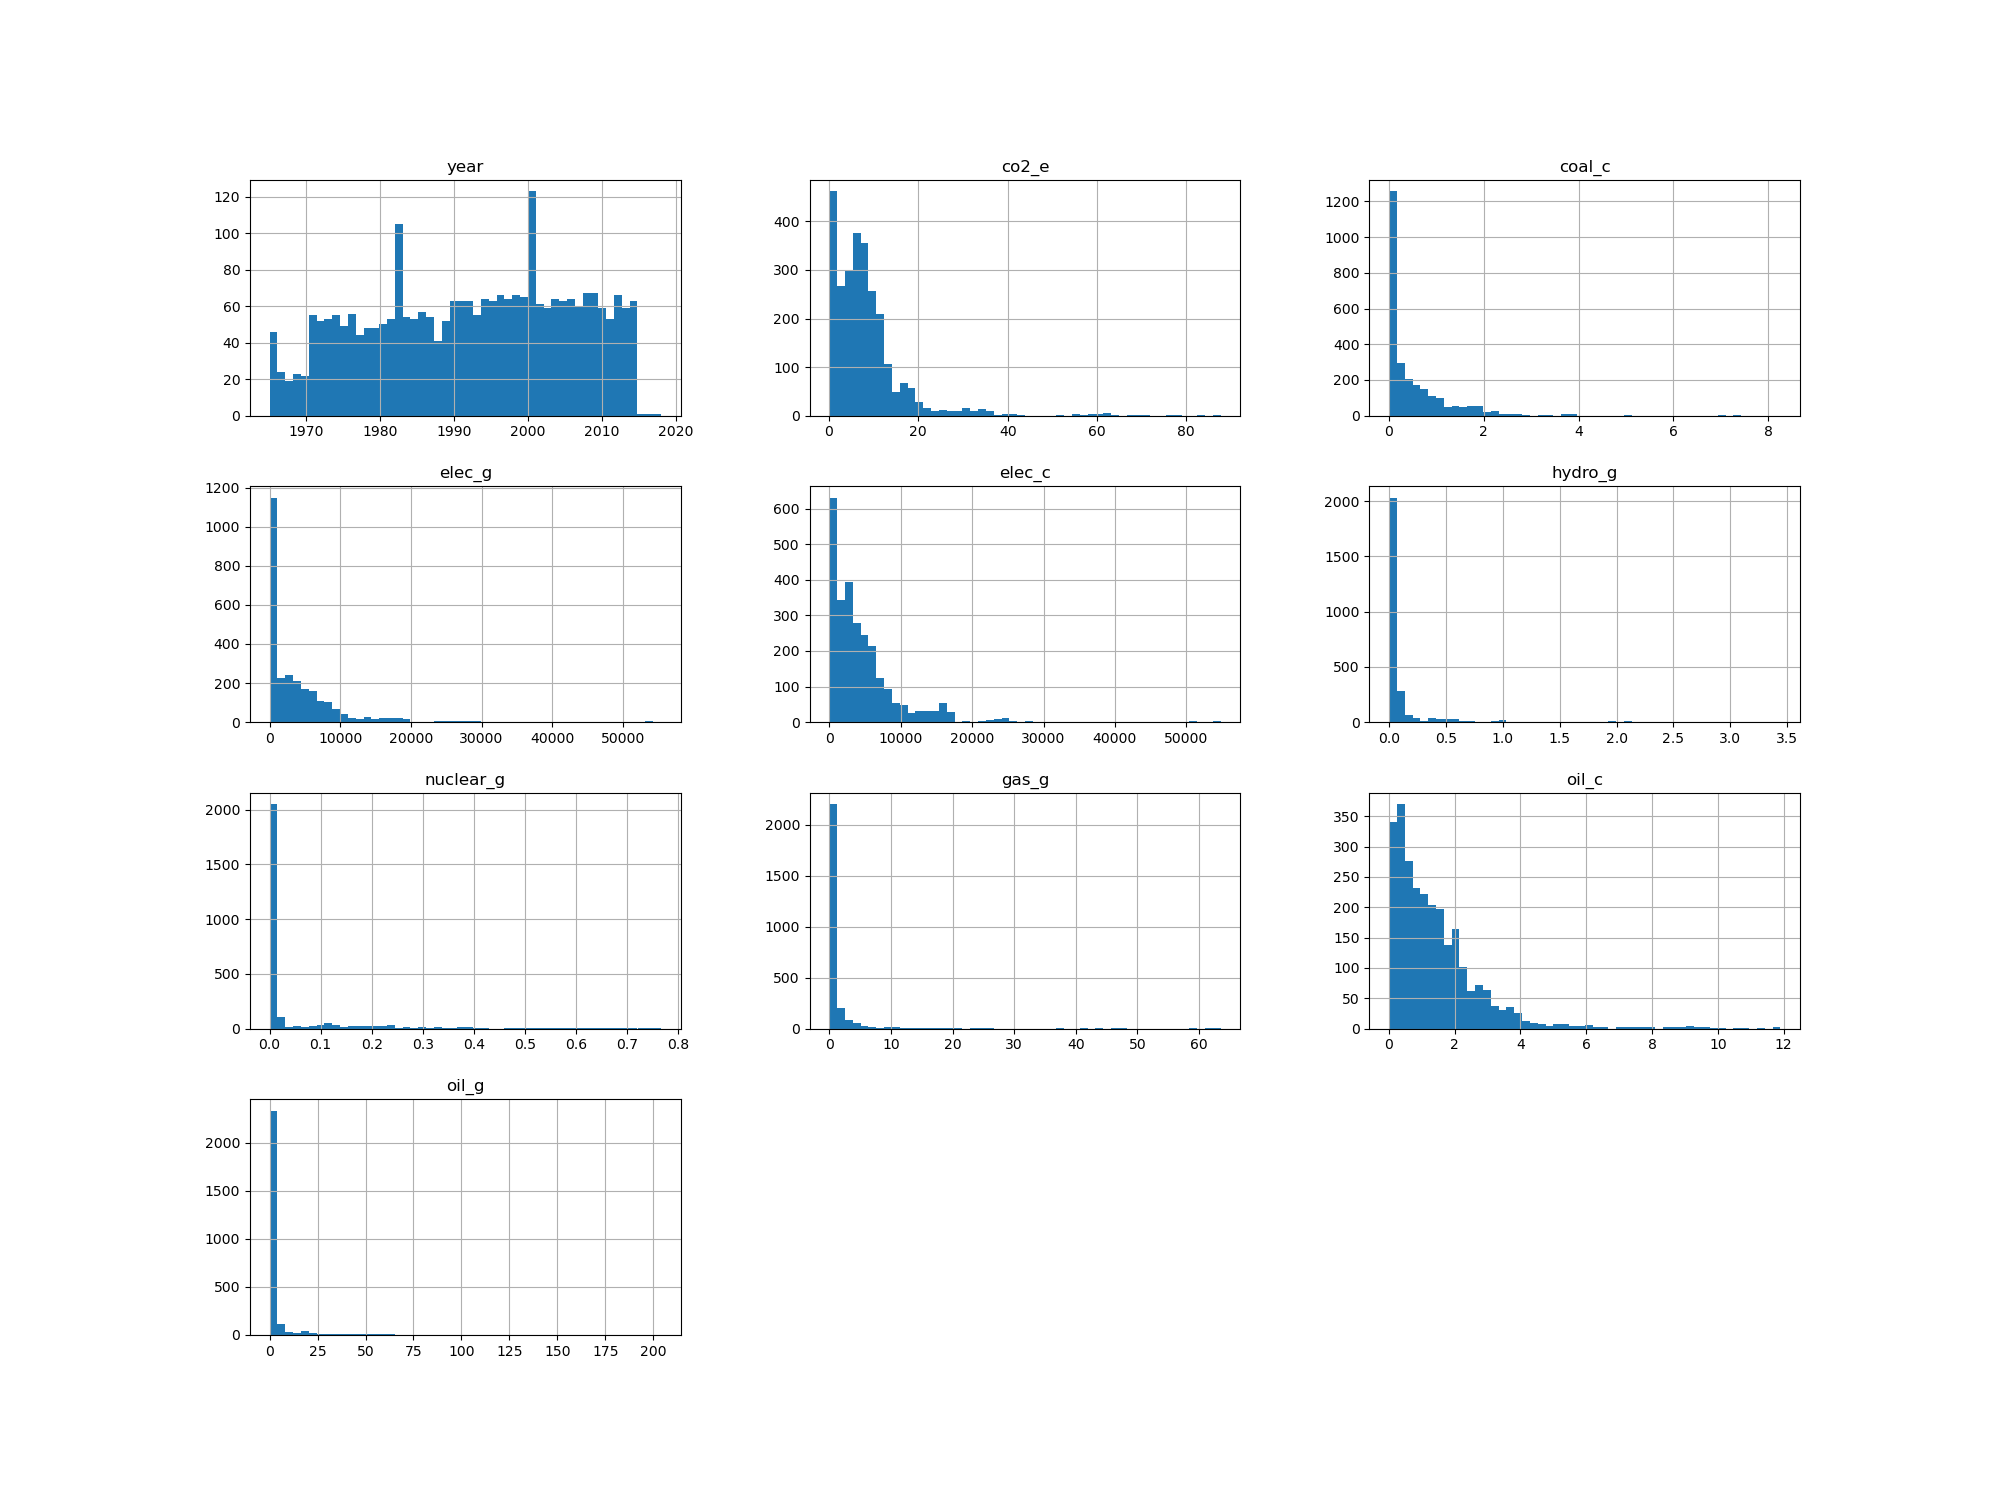

In [9]:
display.Image("../results/figures/histogram_by_numeric_cols.png")

To comprehend the variation in energy consumption across different countries, we plotted histograms for each country against the respective years. It was observed that certain countries such as Azerbaijan, Croatia, Estonia, Kazakhstan, Latvia, Lithuania, North Macedonia, Russia, Slovenia, Turkmenistan, Ukraine, and Uzbekistan lacked data prior to 1990. Consequently, we are contemplating the removal of temporal features (year) from our predictors in the model. This is because the scarcity of these features could compromise the accuracy of predictions for the aforementioned countries.

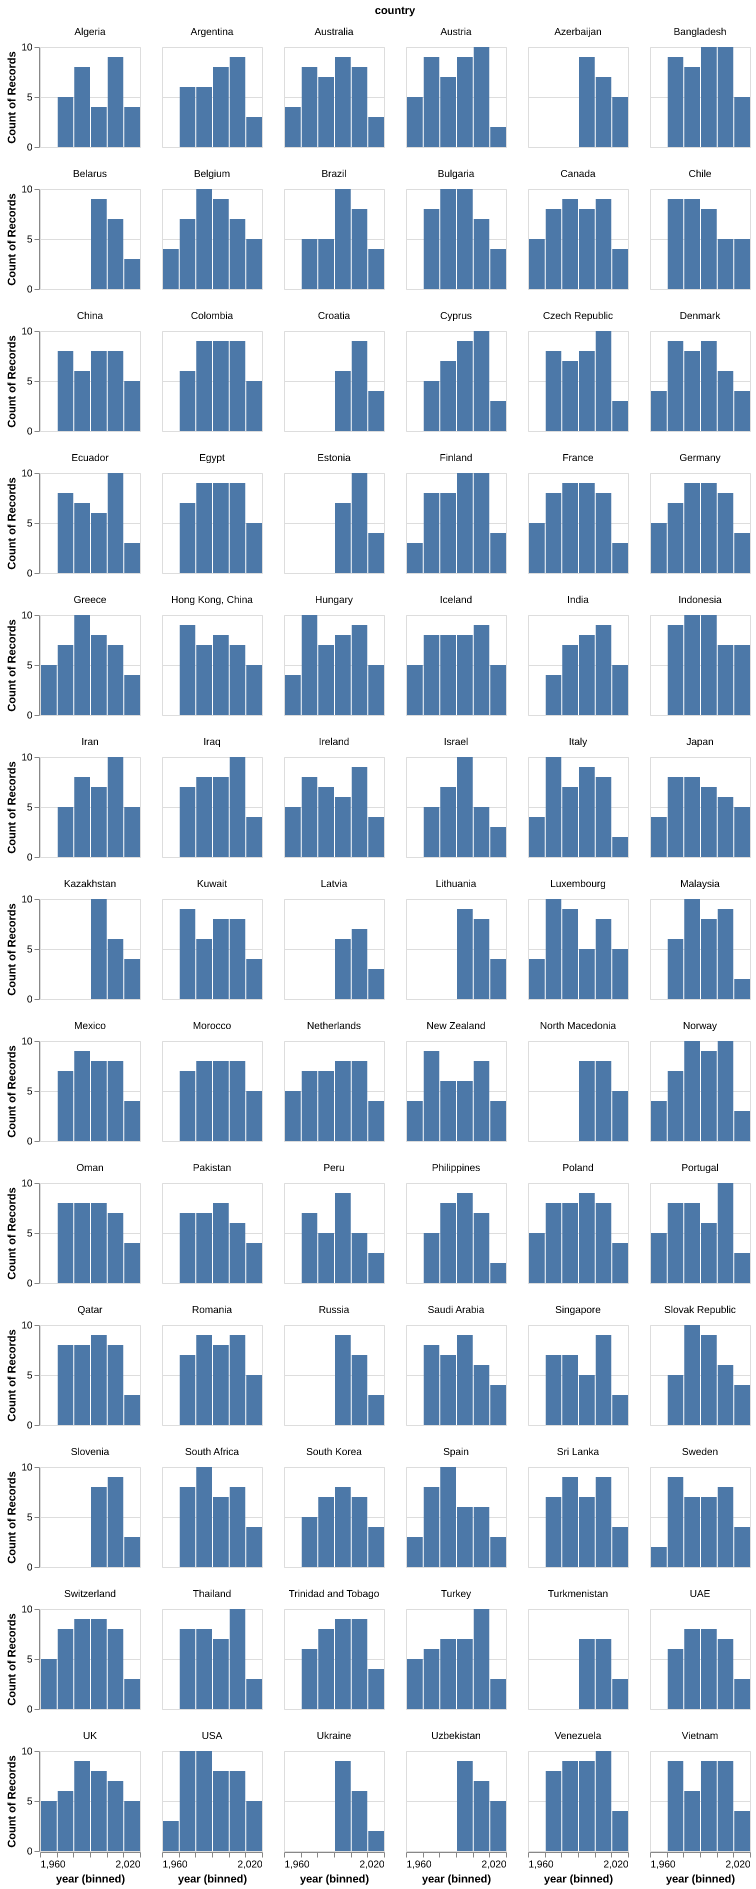

In [10]:
display.Image("../results/figures/histogram_by_country.png")

#### Preprocessing


Based on the nature of the data and insights from exploratory data analysis (EDA), we're taking several steps in our modeling approach. 

We're starting with a naive assumption that there's no temporal dependency between observations, essentially treating each year's observations as independent. As a result, we're removing the `year` attribute from our feature set to prevent the model from exploiting this temporal feature for future predictions. However, we may reconsider this approach and explore the use of temporal feature treatment techniques such as time series split and time series cross-validation in later analyses.

Next, we're standardizing all numeric features by applying a scaling operation. This process ensures that all features will be on a common scale, which is especially important for algorithms that are sensitive to the scale of the input features.

Lastly, we're applying OneHotEncoding to the categorical feature country. This transformation will convert the `country` feature into a more suitable format for our machine learning model, which should help improve its performance.

#### Model Training

We used various regression models with $ \text{R}^ 2 $ as the scoring metrics, and carried out 10-fold cross-validation with each model to find the best performing models.The validation results indicated that the model employing the k-nearest neighbors (k-NN) algorithm had the most commendable performance, with a $ \text{R}^ 2 $ of {glue:text}`KNN_reg`.

#### Hyperparameter Optimization

The hyperparameter `n_neighbors` and `max_categories` were fine-tuned using 10-fold cross validation with  $ \text{R}^2 $ as the classification metric to improve the model performance. According to the validation results, this process led to an improved performance of the KNN model, achieving a $ \text{R}^2 $(`mean_test_r2`) of {glue:text}`mean_test_r2`.

#### Test Results


Our predictive model demonstrated a robust performance on the test data, yielding an overall $\text{R}^2$ of {glue:text}`r2_score_test`. This result is encouraging for the task of predicting a country's per capita CO2 emission given the energy generation and consumption data. Moreover, with a Root Mean Square Error (RMSE) of {glue:text}`rmse_test`, our model exhibits a relatively small deviation from residual to the ground truth, meaning that our model is relatively accurate in terms of CO2 emission prediction.

To visually evaluate our model's performance, we generated a scatter plot that compared predicted and actual values. This plot demonstrated a strong correlation for lower values, specifically in cases of lower energy consumption, suggesting that our model provides accurate predictions for these scenarios. However, with an increase in values, the model's predictions exhibited greater variability. This heightened discrepancy can potentially be attributed to the scarcity of data points at higher values. Our previous distribution plots revealed a left-skewed data distribution, indicating a lack of sufficient data for higher energy consumption values. Consequently, this limitation could restrict the model's learning capacity, affecting its ability to deliver accurate predictions for higher ranges of energy consumption.

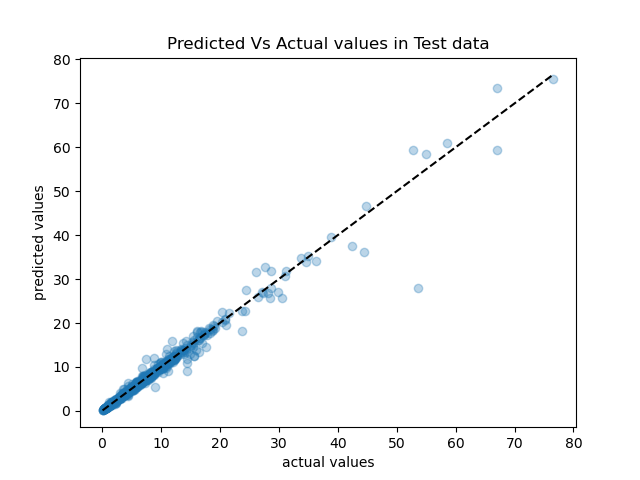

In [11]:
display.Image("../results/figures/scatter_plot.png")

## Limitations and Future Direction

To further improve this model in the future, with hopes of arriving at one that could be used, we suggest several improvements for later revisions. As highlighted during the preprocessing phase, there might be a temporal dependency between observations. Therefore, we could consider incorporating temporal treatments to account for this dependency. 

We should also consider the collinearity among features. While collinearity might not affect the predictive power of models, it does impact the interpretation of the coefficients in linear models. Collinearity reduction treatments, such as feature removal or dimension reduction techniques, could be considered.

Moreover, given the assumption that CO2 emissions may continue to rise in the future, our KNN model might struggle to accurately predict values that lie beyond the range of the training data. In light of this, we could explore other models with similar predictive power that are capable of making accurate predictions for out-of-range input data.

# References

```{bibliography}
